# Librerias

In [1]:
%matplotlib inline
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

from matplotlib import rc
rc('animation', html='jshtml')
from mpl_toolkits import mplot3d # 3d plotting
from matplotlib import animation  # animate 3D plots
#from mpl_toolkits.mplot3d import Axes3D  # 3D plots
import random
import pandas as pd
import numpy as np
import codecs
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import tensorflow as tf
tf.keras.backend.clear_session()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# Preprocesamientos de datos

## Loading de datos y revision basica

In [ ]:
! gdown --id 18U3-jVz3He9PR7nw0dLd8x8aeWLnmvI4

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=18U3-jVz3He9PR7nw0dLd8x8aeWLnmvI4
To: /content/food2.csv
100% 201M/201M [00:00<00:00, 220MB/s]


In [ ]:
df_food = pd.read_csv('food2.csv', on_bad_lines='skip', header=0)
# solo agarramos las filas que TIENEN nombre
tamanoA = df_food.shape[0]
print(df_food.shape)
filtered_df = df_food[df_food[['product_name']].notnull().all(1)]
tamanoD = filtered_df.shape[0]
print(filtered_df.shape, "Se eliminaron:", tamanoA-tamanoD, "datos")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (0,8,14,30,32) have mixed types.Specify dtype option on import or set low_memory=False.



(77109, 186)
(74448, 186) Se eliminaron: 2661 datos


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



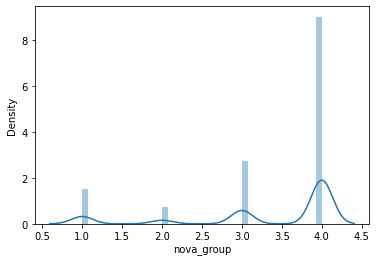

In [ ]:
# la mayoria de los productos son NOVA 4 => son ultra procesados
sns.distplot(filtered_df['nova_group'])

In [ ]:
# mostrar TODAS las columnas
with pd.option_context("display.max_columns", None):
    display(filtered_df)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_en,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,ingredients_tags,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups,food_groups_tags,food_groups_en,states,states_tags,states_en,brand_owner,ecoscore_score,ecoscore_grade,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,000000000004128579,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1649449251,2022-04-08T20:20:51Z,1649449920,2022-04-08T20:32:00Z,Burger Meat Pollo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,unknown,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,194.0,812.0,NaN,11.0,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,0.05,NaN,NaN,NaN,

In [ ]:
# categories_en, origins_en, ecoscore, carbohydrates, etc
pd_food_name = pd.DataFrame(filtered_df[['product_name', 'nova_group', 'nutriscore_grade', 'food_groups_en', 'energy-kcal_100g', 'countries_en']])
pd_food_name = pd_food_name[pd_food_name[['nutriscore_grade']].notnull().all(1)]
pd_food_name = pd_food_name[pd_food_name[['nova_group']].notnull().all(1)]
#pd_food_name = pd_food_name[pd_food_name[['food_groups_en']].notnull().all(1)]

pd_food_name = pd_food_name[pd_food_name[['energy-kcal_100g']].notnull().all(1)]

pd_fn_copy = pd_food_name#.values
pd_fn_copy

,product_name,nova_group,nutriscore_grade,food_groups_en,energy-kcal_100g,countries_en
19,M&M's Peanut Butter,4.0,e,"Sugary snacks,Sweets",563.0,France
32,"Bakers Best, White Bread",4.0,b,"Cereals and potatoes,Bread",235.0,United States
34,"Ritter sport, knusperflakes mit knusprigen cor...",4.0,e,NaN,528.0,United States
42,Dextrose & Maltodextrine mixed berry,4.0,d,"Sugary snacks,Sweets",400.0,France
43,Solid Dark Chocolate,4.0,e,"Sugary snacks,Sweets",526.0,United States
...,...,...,...,...,...,...
76719,Pure Euphoria Longana Honey,2.0,d,"Sugary snacks,Sweets",325.0,Romania
76740,Champignons Noirs,1.0,a,"Fruits and vegetables,Vegetables",203.0,"Belgium,France"
76741,Pâte de curry vert thaï,3.0,c,"Fats and sauces,Dressings and sauces",26.0,"Australia,Belgium,France,Japan,New Zealand,Uni..."
76750,Dutch Lady PureFarm Full Cream Milk,4.0,b,"Milk and dairy products,Milk and yogurt",64.0,Singapore


In [ ]:
pd_fn_copy.to_csv("pd_fn_copy.csv")

In [ ]:
pd_fn_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14743 entries, 19 to 76815
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      14743 non-null  object 
 1   nova_group        14743 non-null  float64
 2   nutriscore_grade  14743 non-null  object 
 3   food_groups_en    12041 non-null  object 
 4   energy-kcal_100g  14743 non-null  float64
 5   countries_en      14721 non-null  object 
dtypes: float64(2), object(4)
memory usage: 806.3+ KB


## Categorical Values Fill

In [ ]:
# FILL categorical data with "Unknown"
c = ('food_groups_en', "countries_en")
for col in c:
  if pd_fn_copy[col].dtype == "object": # null o N/A => era tipo 'object'
    pd_fn_copy[col] = pd_fn_copy[col].fillna("Unknown")

## Discretizacion

In [ ]:
# Encoding categorical data with LabelEncoder() 
# ENNUMERAMOS LAS CATEGORIAS DE CADA COLUMNA para mejor manejo
# DISCRETIZAR
from sklearn.preprocessing import LabelEncoder
catagory_cols = ('nutriscore_grade', 'food_groups_en', 'countries_en')
for c in catagory_cols:
  le = LabelEncoder()
  print(c, le.fit_transform(pd_fn_copy[c].values))
  pd_fn_copy[c] = le.fit_transform(pd_fn_copy[c].values)

max(pd_fn_copy['food_groups_en'])

# NORAMALIZAR => datos muy grandes 
#TODOS

nutriscore_grade [4 1 4 ... 2 1 2]
food_groups_en [44 10 45 ... 18 37 35]
countries_en [161 364 364 ...  17 340 257]


45

In [ ]:
pd_fn_copy
# delete 'brand' and 'code' = DONE
# Tokenize 'product_name' => 25 features then Word2Vec = DONE
# Load glove and Merge to DataFrame = DONE
# Use glove to train 
# kmeans for total 30 features
# choose best k (elbow rule) => show loss
# PCA to scatterplot

,product_name,nova_group,nutriscore_grade,food_groups_en,energy-kcal_100g,countries_en
19,M&M's Peanut Butter,4.0,4,44,563.0,161
32,"Bakers Best, White Bread",4.0,1,10,235.0,364
34,"Ritter sport, knusperflakes mit knusprigen cor...",4.0,4,45,528.0,364
42,Dextrose & Maltodextrine mixed berry,4.0,3,44,400.0,161
43,Solid Dark Chocolate,4.0,4,44,526.0,364
...,...,...,...,...,...,...
76719,Pure Euphoria Longana Honey,2.0,3,44,325.0,334
76740,Champignons Noirs,1.0,0,33,203.0,62
76741,Pâte de curry vert thaï,3.0,2,18,26.0,17
76750,Dutch Lady PureFarm Full Cream Milk,4.0,1,37,64.0,340


## Normalizar

In [ ]:
from sklearn import preprocessing
normalized_arr = preprocessing.normalize(pd_fn_copy[['food_groups_en','energy-kcal_100g', 'countries_en']].values)
#print(normalized_arr[:, 0])
pd_fn_copy['food_groups_en'] = normalized_arr[:, 0]
pd_fn_copy['energy-kcal_100g'] = normalized_arr[:, 1]
pd_fn_copy['countries_en'] = normalized_arr[:, 2]

pd_fn_copy

,product_name,nova_group,nutriscore_grade,food_groups_en,energy-kcal_100g,countries_en
19,"[m, &, m, 's, peanut, butter]",4.0,4,0.074929,0.958757,0.274174
32,"[bakers, best, ,, white, bread]",4.0,1,0.023074,0.542245,0.839903
34,"[ritter, sport, ,, knusperflakes, mit, knuspri...",4.0,4,0.069997,0.821294,0.566195
42,"[dextrose, &, maltodextrine, mixed, berry]",4.0,3,0.101517,0.922882,0.371460
43,"[solid, dark, chocolate]",4.0,4,0.068624,0.820366,0.567706
...,...,...,...,...,...,...
76719,"[pure, euphoria, longana, honey]",2.0,3,0.093997,0.694297,0.713524
76740,"[champignons, noirs]",1.0,0,0.153626,0.945035,0.288631
76741,"[pâte, de, curry, vert, thaï]",3.0,2,0.501356,0.724181,0.473503
76750,"[dutch, lady, purefarm, full, cream, milk]",4.0,1,0.106339,0.183938,0.977169


## Graficos y Comprobaciones

In [ ]:
# todos los datos llenos!
pd_fn_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14743 entries, 19 to 76815
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_name      14743 non-null  object 
 1   nova_group        14743 non-null  float64
 2   nutriscore_grade  14743 non-null  int64  
 3   food_groups_en    14743 non-null  int64  
 4   energy-kcal_100g  14743 non-null  float64
 5   countries_en      14743 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 806.3+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


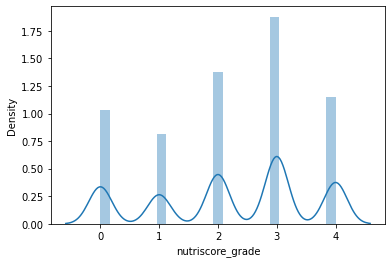

In [ ]:
sns.distplot(pd_fn_copy['nutriscore_grade'])

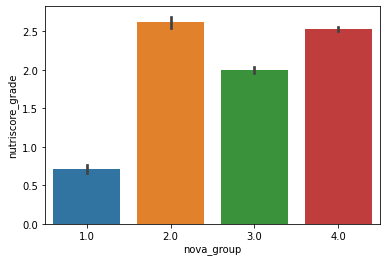

In [ ]:
sns.barplot(x='nova_group', y='nutriscore_grade', data=pd_fn_copy)

## Tokenize 'product_name'

In [ ]:
pd_fn_copy['product_name'] = pd_fn_copy['product_name'].str.lower()
pd_fn_copy_values = pd_fn_copy['product_name'].values

for i in range(len(pd_fn_copy_values)):
  pd_fn_copy_values[i] = nltk.word_tokenize(pd_fn_copy_values[i])

#pd_fn_copy_values
pd_fn_copy['product_name'] = pd_fn_copy_values
pd_fn_copy

,product_name,nova_group,nutriscore_grade,food_groups_en,energy-kcal_100g,countries_en
19,"[m, &, m, 's, peanut, butter]",4.0,4,44,563.0,161
32,"[bakers, best, ,, white, bread]",4.0,1,10,235.0,364
34,"[ritter, sport, ,, knusperflakes, mit, knuspri...",4.0,4,45,528.0,364
42,"[dextrose, &, maltodextrine, mixed, berry]",4.0,3,44,400.0,161
43,"[solid, dark, chocolate]",4.0,4,44,526.0,364
...,...,...,...,...,...,...
76719,"[pure, euphoria, longana, honey]",2.0,3,44,325.0,334
76740,"[champignons, noirs]",1.0,0,33,203.0,62
76741,"[pâte, de, curry, vert, thaï]",3.0,2,18,26.0,17
76750,"[dutch, lady, purefarm, full, cream, milk]",4.0,1,37,64.0,340


## Load GloVe and Merge to DataFrame

In [ ]:
# 50 d => 6b
# 1-4-ujVCACrHLyZavl5txG61cPXgPLNrF
#####
# 25 d => twitter
# 1gGsbQTyc4QizwWiXpV20g3JiE6NbZ4rC

! gdown --id 1gGsbQTyc4QizwWiXpV20g3JiE6NbZ4rC

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1gGsbQTyc4QizwWiXpV20g3JiE6NbZ4rC
To: /content/glove.twitter.27B.25d.txt
100% 258M/258M [00:03<00:00, 78.0MB/s]


In [ ]:
# iniciamos el archivo de GloVe
# COMPLICADO => usaremos open
#glove_df = pd.read_csv('glove.twitter.27B.25d.txt', sep = ' ', header = None)#, on_bad_lines='skip')
#glove_df

f = open('glove.twitter.27B.25d.txt', 'r')
lines = f.readlines()
separated = [l.replace('\n', '').split(' ') for l in lines]
glove_df = pd.DataFrame(data = separated)
glove_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,<user>,0.62415,0.62476,-0.082335,0.20101,-0.13741,-0.11431,0.77909,2.6356,-0.46351,...,-0.94879,-0.017336,-0.86349,-1.3348,0.046811,0.36999,-0.57663,-0.48469,0.40078,0.75345
1,.,0.69586,-1.1469,-0.41797,-0.022311,-0.023801,0.82358,1.2228,1.741,-0.90979,...,-0.57058,-0.50861,-0.16575,-0.98153,-0.8213,0.24333,-0.14482,-0.67877,0.7061,0.40833
2,:,1.1242,0.054519,-0.037362,0.10046,0.11923,-0.30009,1.0938,2.537,-0.072802,...,-0.99347,-0.65072,-0.030948,-1.0817,-0.64701,0.32341,-0.41612,-0.5268,-0.047166,0.71549
3,rt,0.74056,0.9155,-0.16352,0.35843,0.05266,0.1456,1.0421,2.8073,0.12865,...,-0.91433,-0.40456,-1.0988,-1.0333,-0.17875,0.37979,-0.25922,-0.74854,0.36001,0.61206
4,",",0.84705,-1.0349,-0.050419,0.27164,-0.58659,0.99514,0.25267,1.6963,0.10313,...,-0.67015,-0.64812,0.010373,-0.71889,-0.74997,0.24862,0.10319,-1.1732,0.58196,0.33846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193509,ﾊﾞｲﾊﾞｰｲ,-2.5055,-0.53843,-0.34846,-0.080374,-2.8666,-0.09645,0.64546,-0.63673,0.9529,...,-0.00068518,-0.68251,-0.42923,2.3746,0.0012159,0.057933,-2.0751,1.0871,2.0924,-0.58214
1193510,ﾊﾟﾝﾁ,-0.62724,-1.1214,-0.09727,1.2428,-1.6052,0.13525,-2.2035,-2.4171,-0.55192,...,0.29176,-0.58392,-1.193,2.0079,1.6253,0.60964,-2.3606,1.0951,1.9978,-0.39325
1193511,ﾔﾒﾀﾏｴ,2.3229,-1.8482,-0.83149,-0.75932,-0.6995,2.2021,-2.5598,-1.8899,1.8358,...,-0.49966,-2.0357,0.28067,1.3846,0.025971,0.33081,0.82892,-1.1397,1.4996,3.1768
1193512,ﾖｲｼｮｯ,-0.44589,-3.5589,-0.25854,-0.10708,-1.0906,0.66615,1.1186,-3.626,0.26632,...,0.537,0.37963,-0.94321,1.743,1.1154,0.058416,-0.46385,-0.67204,3.4037,-0.16321


In [ ]:
glove_df.iloc[4500:4510]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
4500,common,0.79207,0.062946,-0.68277,0.48824,0.46192,0.11789,1.2844,-0.96469,0.10905,...,-0.082386,0.43407,0.51328,0.99237,-0.027394,0.29533,0.32998,-0.66908,-0.3202,-0.62817
4501,fucks,-0.24376,0.73079,0.16013,0.33976,0.88294,0.14686,0.81559,-0.80593,-0.88568,...,0.3505,0.24868,-0.97125,0.92748,0.28685,1.5474,0.75763,0.69985,-0.66141,-0.091979
4502,متى,0.49779,0.30125,0.57476,-0.46331,0.28578,0.060106,1.4448,1.2682,-1.713,...,-0.42522,-0.72431,-0.67045,-0.32384,-1.2987,0.42126,0.14028,0.95767,0.90686,1.2127
4503,너무,-0.75674,-1.4964,-0.43387,0.19148,-0.585,2.5622,1.109,0.7825,-0.80342,...,-1.6352,-0.49265,-0.1077,-1.7694,-0.92392,1.3447,-1.6682,-0.56314,1.1163,0.52937
4504,perry,-0.29674,-0.47157,1.1019,0.19543,-0.54441,-0.36884,0.74294,0.97764,-0.26258,...,0.25337,-1.1415,-0.22288,-0.11748,0.35895,-0.13008,0.7309,-0.34505,-0.86994,-0.13175
4505,день,0.73083,-2.2637,-0.0074491,-1.1583,-1.5286,0.77059,0.12348,0.55035,-0.91879,...,-2.3073,1.3762,-0.11717,-0.12611,0.036649,-1.8161,-1.923,-1.8209,0.45576,2.1907
4506,mensen,2.2336,0.95025,-0.65675,0.048471,-0.28648,0.92012,-1.6226,0.44081,-1.9156,...,2.1094,0.92164,1.7223,-1.5469,0.75578,-0.66614,0.76988,-1.7318,0.7477,0.73256
4507,joy,-1.0811,-0.032919,-0.15043,1.3471,-0.41869,-0.12324,1.0553,0.026657,-0.099019,...,0.11403,-0.0018131,0.62786,0.58898,-0.10829,-0.43621,-0.077728,-0.58776,0.8542,0.22741
4508,monster,-0.48138,-0.070815,0.36693,0.27124,0.58023,0.34953,1.0754,0.6617,0.34026,...,0.083857,0.34443,-0.17557,0.34568,0.61979,-0.66142,0.40532,0.046876,-0.35343,0.74864
4509,pretend,-0.06545,0.19892,0.042489,0.34536,-1.0821,0.085019,1.5652,-1.0343,0.18919,...,1.538,0.19825,-0.50146,0.64671,-1.0189,0.53298,0.47438,0.086498,0.094392,-0.29428


In [ ]:
pd_fn_copy_values = pd_fn_copy['product_name'].values
#pd_fn_copy_values[0]
glove_values_df = pd.DataFrame()
npglove = np.array(glove_df) # creamos un numpy de los datos de GloVe para ir velocidad turbo
for i, lista in enumerate(pd_fn_copy_values):
  fila = [] # fila que contiene los datos que despues agregaremos al pandas GRANDE
  for j, palabra in enumerate(lista):
    #filaj = glove_df.loc[glove_df[0] == palabra].values # sacamos la lista de numeros que tiene la palabra 'palabra' de nuestra lista de nombres de producto
    filaj = npglove[npglove[:, 0] == palabra, :] # usamos mascaras
    if len(filaj) == 0:
      continue
    if len(filaj) > 0: #comprobamos que no esta vacia
      #print("palabra", j, filaj[0][0]) # BORRAR DESPUES
      fila.append(filaj[0][1:26].astype(float)) # pegamos valores exceptuando el string (palabra) y lo convertimos a un float

  fila = np.mean(fila, axis=0) # sacamos la media de todos los numeros
  if type(fila) == np.float64:
    fila = np.zeros(25)
  print("fila", i, fila)
  fila_df = pd.DataFrame(fila).T # ya esta listo para agregarse a nuestro df GRANDE
  glove_values_df = glove_values_df.append(fila_df, ignore_index = True)

pd_fn_copy_copy2 = pd.concat( [pd_fn_copy, glove_values_df], axis=1)
pd_fn_copy_copy2

fila 0 [-8.77350000e-02 -2.59631667e-02 -2.44681333e-01  1.74950000e-01
 -4.19265000e-01  4.46880000e-01  6.39931667e-01  3.77928333e-01
 -8.27243333e-02 -9.75836667e-02  5.80898333e-01 -9.70583333e-02
 -4.01443333e+00 -5.38298333e-01 -3.94463000e-01 -3.50265667e-01
  3.52496667e-02 -3.53527667e-01 -5.14181667e-01  7.73588333e-01
 -3.72671667e-01 -1.73808333e-01 -2.26216667e-03  3.14486333e-01
  2.45633333e-01]
fila 1 [-0.23992    -0.149153    0.1506042  -0.048654   -0.055748    0.490484
  0.586398   -0.373816    0.206468    0.094812    0.548244   -0.326662
 -3.7339     -0.51495538 -0.26866    -0.43349     0.494554   -0.5089754
 -0.0488108   0.588508   -0.21524     0.4720638  -0.477712    0.129884
  0.2282926 ]
fila 2 [ 0.18907    -0.4460796  -0.2013118  -0.43122    -0.15027     0.466954
 -0.6106446  -0.29700804  0.445728   -0.1786426   0.4635456  -0.127298
 -2.17649    -0.8187346   0.386684   -0.118554    0.316538    0.0720802
 -0.6729982   0.0073     -0.2874586   0.19540966 -0.525274

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Se han truncado las últimas 5000 líneas del flujo de salida.
 -0.751635  -0.13505    0.44867    0.054095   0.285975  -2.0679
 -0.09175   -1.052225   0.32031    0.44647   -0.290022  -0.224475
 -0.03651    0.896515  -0.79816    1.23228    1.09938    0.110886
  1.433485 ]
fila 13690 [-1.3496575   0.34015275  0.1350225  -0.29951    -0.2417925  -0.9998725
 -0.43471275  0.534555    1.48352     0.660245    0.323855   -0.597315
 -0.40932475 -0.15423925 -0.2724975   1.277475   -0.08496     0.590588
 -0.1729755  -0.1503075  -0.8825475   0.1527685   0.14708688 -0.29094475
 -0.00715475]
fila 13691 [-0.60021     0.05748017 -0.04930667 -0.20941667  0.086255   -0.56497
 -0.57817833  0.91602183  1.16725     1.07611333  0.34619667 -1.38651
 -1.43136117 -1.04691667 -0.24929333  0.60821    -0.468825    0.2666285
 -1.37218333 -0.19291167 -1.04018767  0.02012967 -0.310992    0.42958533
  0.01088667]
fila 13692 [-0.960815   0.227045   0.61181   -0.140845  -0.1748     0.08504
  0.1296085  1.359645   1.107505

,product_name,nova_group,nutriscore_grade,food_groups_en,energy-kcal_100g,countries_en,0,1,2,3,...,15,16,17,18,19,20,21,22,23,24
0,NaN,NaN,NaN,NaN,NaN,NaN,-0.087735,-0.025963,-0.244681,0.174950,...,-0.350266,0.035250,-0.353528,-0.514182,0.773588,-0.372672,-0.173808,-0.002262,0.314486,0.245633
1,NaN,NaN,NaN,NaN,NaN,NaN,-0.239920,-0.149153,0.150604,-0.048654,...,-0.433490,0.494554,-0.508975,-0.048811,0.588508,-0.215240,0.472064,-0.477712,0.129884,0.228293
2,NaN,NaN,NaN,NaN,NaN,NaN,0.189070,-0.446080,-0.201312,-0.431220,...,-0.118554,0.316538,0.072080,-0.672998,0.007300,-0.287459,0.195410,-0.525274,-0.132562,0.446382
3,NaN,NaN,NaN,NaN,NaN,NaN,-0.446223,0.028777,0.014580,0.223593,...,-0.181915,0.500792,-0.302847,0.560170,0.680292,-0.322063,-0.029376,-0.302648,0.198695,-0.093913
4,NaN,NaN,NaN,NaN,NaN,NaN,-0.643080,-0.679067,0.341500,0.331467,...,-0.075773,0.634260,-0.195730,0.228343,0.431533,-1.081693,0.421113,0.159365,0.546123,0.194997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76719,"[pure, euphoria, longana, honey]",2.0,3.0,44.0,325.0,334.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76740,"[champignons, noirs]",1.0,0.0,33.0,203.0,62.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76741,"[pâte, de, curry, vert, thaï]",3.0,2.0,18.0,26.0,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76750,"[dutch, lady, purefarm, full, cream, milk]",4.0,1.0,37.0,64.0,340.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# reseteamos los indices para que se concatenen correctamente
#pd_fn_copy_copy2 = pd.concat( [pd_fn_copy.reset_index(), glove_values_df.reset_index()], axis=1)
# GUARDAR EN .parquet
food_df_final = pd.merge( pd_fn_copy.reset_index(), glove_values_df.reset_index(), left_index=True, right_index=True)
food_df_final

,index_x,product_name,nova_group,nutriscore_grade,food_groups_en,energy-kcal_100g,countries_en,index_y,0,1,...,15,16,17,18,19,20,21,22,23,24
0,19,"[m, &, m, 's, peanut, butter]",4.0,4,0.074929,0.958757,0.274174,0,-0.087735,-0.025963,...,-0.350266,0.035250,-0.353528,-0.514182,0.773588,-0.372672,-0.173808,-0.002262,0.314486,0.245633
1,32,"[bakers, best, ,, white, bread]",4.0,1,0.023074,0.542245,0.839903,1,-0.239920,-0.149153,...,-0.433490,0.494554,-0.508975,-0.048811,0.588508,-0.215240,0.472064,-0.477712,0.129884,0.228293
2,34,"[ritter, sport, ,, knusperflakes, mit, knuspri...",4.0,4,0.069997,0.821294,0.566195,2,0.189070,-0.446080,...,-0.118554,0.316538,0.072080,-0.672998,0.007300,-0.287459,0.195410,-0.525274,-0.132562,0.446382
3,42,"[dextrose, &, maltodextrine, mixed, berry]",4.0,3,0.101517,0.922882,0.371460,3,-0.446223,0.028777,...,-0.181915,0.500792,-0.302847,0.560170,0.680292,-0.322063,-0.029376,-0.302648,0.198695,-0.093913
4,43,"[solid, dark, chocolate]",4.0,4,0.068624,0.820366,0.567706,4,-0.643080,-0.679067,...,-0.075773,0.634260,-0.195730,0.228343,0.431533,-1.081693,0.421113,0.159365,0.546123,0.194997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,76719,"[pure, euphoria, longana, honey]",2.0,3,0.093997,0.694297,0.713524,14738,-0.974700,-0.156400,...,0.252117,0.355266,0.456340,0.130024,0.376882,-0.447027,0.252302,-0.097800,0.335025,0.395397
14739,76740,"[champignons, noirs]",1.0,0,0.153626,0.945035,0.288631,14739,0.434527,-0.649195,...,0.921410,0.030980,-1.284690,-1.003645,2.050350,0.414350,0.322675,-0.378380,-1.260800,0.089190
14740,76741,"[pâte, de, curry, vert, thaï]",3.0,2,0.501356,0.724181,0.473503,14740,-0.552748,-0.337820,...,0.443982,0.152438,-0.185860,-0.891228,1.242048,-0.319330,0.141400,0.203432,-0.387859,0.993974
14741,76750,"[dutch, lady, purefarm, full, cream, milk]",4.0,1,0.106339,0.183938,0.977169,14741,-0.409517,0.054518,...,-0.167775,0.847791,-0.521742,0.109326,0.509638,-0.694020,0.316839,-0.152803,0.068330,0.464604


## Testeo Intensivo

In [ ]:
fila = []
fila1 = glove_df.loc[glove_df[0] == 'peanut'].values
fila2 = glove_df.loc[glove_df[0] == 'butter'].values
fila3 = glove_df.loc[glove_df[0] == 'chocolate'].values
fila.append(fila1[0][1:26].astype(float))
fila.append(fila2[0][1:26].astype(float))
fila.append(fila3[0][1:26].astype(float))
print(fila)
fila = np.mean(fila, axis=0)
fila_df = pd.DataFrame(fila).T
print(fila_df)

if len(fila1) == 0:
      print("VACIA")
if len(fila2) == 0:
      print("VACIA")

fila1_df = pd.DataFrame(fila1[0][1:26]).T
fila2_df = pd.DataFrame(fila2[0][1:26]).T
fila3_df = pd.DataFrame(fila3[0][1:26]).T

fila_df = pd.DataFrame()
fila_df = fila_df.append(fila1_df, ignore_index = True)
fila_df = fila_df.append(fila2_df, ignore_index = True)
fila_df = fila_df.append(fila3_df, ignore_index = True)
fila_df

test_df = pd.DataFrame([['abc', 'def', 'ghi'],['1','2','3']]).T
test_df

df_finalfinal = pd.concat( [test_df, fila_df], axis=1) 
df_finalfinal

#fila.append(fila1[0][1:26].astype(float))
#fila.append(fila2[0][1:26].astype(float))
#print(fila)
#fila = np.mean(fila, axis=0)
#print(fila)

#pd.DataFrame(['0', '1', '2']).T.assign({'temp_c': [17.0]})#(pd.DataFrame(['0']).T)
#pd.DataFrame(fila).T.insert(26, "col26", pd.DataFrame(['0', '1', '2']).T)

[array([-0.35289 , -0.081656,  0.038009,  1.166   , -0.50529 ,  0.52657 ,
        1.2154  , -1.7961  ,  0.069234,  0.2256  ,  1.2474  , -0.39018 ,
       -2.4429  , -1.8804  ,  0.064362, -0.61548 ,  1.4079  , -1.048   ,
        0.24661 ,  0.90792 , -0.62797 ,  0.899   , -0.24812 ,  0.79051 ,
        0.63858 ]), array([-0.42623 , -0.45425 , -0.038127,  1.5023  , -0.59333 ,  0.98628 ,
        0.99925 , -1.8484  ,  0.32456 ,  0.23692 ,  1.2231  , -0.34113 ,
       -2.9649  , -1.7663  ,  0.15566 , -0.64441 ,  1.3621  , -0.80118 ,
        0.14193 ,  0.86598 , -0.62134 ,  0.62804 ,  0.03288 ,  1.0072  ,
        0.82952 ]), array([-0.74392  , -0.87193  ,  0.62621  ,  1.2915   ,  0.47082  ,
        1.1838   ,  1.1505   , -0.56263  , -0.27385  , -0.1778   ,
        0.97701  , -2.5366   , -3.3386   , -1.3806   , -0.017848 ,
       -0.51599  ,  0.87151  , -0.60128  ,  0.14003  ,  0.43523  ,
       -0.95216  ,  0.35649  , -0.0045359,  1.2983   ,  1.0735   ])]
        0         1         2         

,0,1,0,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,abc,1,-0.35289,-0.081656,0.038009,1.166,-0.50529,0.52657,1.2154,-1.7961,...,-0.61548,1.4079,-1.048,0.24661,0.90792,-0.62797,0.899,-0.24812,0.79051,0.63858
1,def,2,-0.42623,-0.45425,-0.038127,1.5023,-0.59333,0.98628,0.99925,-1.8484,...,-0.64441,1.3621,-0.80118,0.14193,0.86598,-0.62134,0.62804,0.03288,1.0072,0.82952
2,ghi,3,-0.74392,-0.87193,0.62621,1.2915,0.47082,1.1838,1.1505,-0.56263,...,-0.51599,0.87151,-0.60128,0.14003,0.43523,-0.95216,0.35649,-0.0045359,1.2983,1.0735


# Modelaje

In [2]:
# si es que todo falla
! gdown --id 1wNUjEDCKQkK0sxsMs8pUOaH2ElrYldfQ # dataframe ya procesado
! gdown --id 1mRhkA5Br6OPW9-vU2o785GdA70yNDrUP # dataframe sin discretizar para sacar marcas
food_df_final = pd.read_csv("final_food.csv")
pd_fn_copy = pd.read_csv("pd_fn_copy.csv")
food_df_final

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1wNUjEDCKQkK0sxsMs8pUOaH2ElrYldfQ
To: /content/final_food.csv
100% 6.83M/6.83M [00:00<00:00, 139MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1mRhkA5Br6OPW9-vU2o785GdA70yNDrUP
To: /content/pd_fn_copy.csv
100% 1.26M/1.26M [00:00<00:00, 55.5MB/s]


,Unnamed: 0,Unnamed: 0.1,index_x,product_name,nova_group,nutriscore_grade,food_groups_en,energy-kcal_100g,countries_en,index_y,...,15,16,17,18,19,20,21,22,23,24
0,0,0,19,"['m', '&', 'm', ""'s"", 'peanut', 'butter']",4.0,4,0.074929,0.958757,0.274174,0,...,-0.350266,0.035250,-0.353528,-0.514182,0.773588,-0.372672,-0.173808,-0.002262,0.314486,0.245633
1,1,1,32,"['bakers', 'best', ',', 'white', 'bread']",4.0,1,0.023074,0.542245,0.839903,1,...,-0.433490,0.494554,-0.508975,-0.048811,0.588508,-0.215240,0.472064,-0.477712,0.129884,0.228293
2,2,2,34,"['ritter', 'sport', ',', 'knusperflakes', 'mit...",4.0,4,0.069997,0.821294,0.566195,2,...,-0.118554,0.316538,0.072080,-0.672998,0.007300,-0.287459,0.195410,-0.525274,-0.132562,0.446382
3,3,3,42,"['dextrose', '&', 'maltodextrine', 'mixed', 'b...",4.0,3,0.101517,0.922882,0.371460,3,...,-0.181915,0.500792,-0.302847,0.560170,0.680292,-0.322062,-0.029376,-0.302648,0.198695,-0.093912
4,4,4,43,"['solid', 'dark', 'chocolate']",4.0,4,0.068624,0.820366,0.567706,4,...,-0.075773,0.634260,-0.195730,0.228343,0.431533,-1.081693,0.421113,0.159365,0.546123,0.194997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,14738,14738,76719,"['pure', 'euphoria', 'longana', 'honey']",2.0,3,0.093997,0.694297,0.713524,14738,...,0.252117,0.355266,0.456340,0.130024,0.376882,-0.447027,0.252302,-0.097800,0.335025,0.395397
14739,14739,14739,76740,"['champignons', 'noirs']",1.0,0,0.153626,0.945035,0.288631,14739,...,0.921410,0.030980,-1.284690,-1.003645,2.050350,0.414350,0.322675,-0.378380,-1.260800,0.089190
14740,14740,14740,76741,"['pâte', 'de', 'curry', 'vert', 'thaï']",3.0,2,0.501356,0.724181,0.473503,14740,...,0.443982,0.152438,-0.185860,-0.891228,1.242048,-0.319330,0.141400,0.203432,-0.387859,0.993974
14741,14741,14741,76750,"['dutch', 'lady', 'purefarm', 'full', 'cream',...",4.0,1,0.106339,0.183938,0.977169,14741,...,-0.167775,0.847791,-0.521742,0.109326,0.509638,-0.694020,0.316839,-0.152803,0.068330,0.464604


In [3]:
# Creamos el nuevo dataframe 'X' que solo tendra los valores numericos
X1 = food_df_final.iloc[:,4:8] # aumentar a medida que volvemos a cargar el .csv
X2 = food_df_final.iloc[:,8:]

X = pd.merge( X1.reset_index(), X2.reset_index(), left_index=True, right_index=True)
X = X.drop(['index_x', 'index_y'], axis=1)
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_y'} in the result is deprecated and will raise a MergeError in a future version.
  """


,nova_group,nutriscore_grade,food_groups_en,energy-kcal_100g,countries_en,0,1,2,3,4,...,15,16,17,18,19,20,21,22,23,24
0,4.0,4,0.074929,0.958757,0.274174,-0.087735,-0.025963,-0.244681,0.174950,-0.419265,...,-0.350266,0.035250,-0.353528,-0.514182,0.773588,-0.372672,-0.173808,-0.002262,0.314486,0.245633
1,4.0,1,0.023074,0.542245,0.839903,-0.239920,-0.149153,0.150604,-0.048654,-0.055748,...,-0.433490,0.494554,-0.508975,-0.048811,0.588508,-0.215240,0.472064,-0.477712,0.129884,0.228293
2,4.0,4,0.069997,0.821294,0.566195,0.189070,-0.446080,-0.201312,-0.431220,-0.150270,...,-0.118554,0.316538,0.072080,-0.672998,0.007300,-0.287459,0.195410,-0.525274,-0.132562,0.446382
3,4.0,3,0.101517,0.922882,0.371460,-0.446223,0.028777,0.014580,0.223593,-0.108662,...,-0.181915,0.500792,-0.302847,0.560170,0.680292,-0.322062,-0.029376,-0.302648,0.198695,-0.093912
4,4.0,4,0.068624,0.820366,0.567706,-0.643080,-0.679067,0.341500,0.331467,0.345613,...,-0.075773,0.634260,-0.195730,0.228343,0.431533,-1.081693,0.421113,0.159365,0.546123,0.194997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,2.0,3,0.093997,0.694297,0.713524,-0.974700,-0.156400,-0.231503,0.600250,-0.240487,...,0.252117,0.355266,0.456340,0.130024,0.376882,-0.447027,0.252302,-0.097800,0.335025,0.395397
14739,1.0,0,0.153626,0.945035,0.288631,0.434527,-0.649195,-1.278170,0.351349,-0.686160,...,0.921410,0.030980,-1.284690,-1.003645,2.050350,0.414350,0.322675,-0.378380,-1.260800,0.089190
14740,3.0,2,0.501356,0.724181,0.473503,-0.552748,-0.337820,-0.326352,0.516222,0.018378,...,0.443982,0.152438,-0.185860,-0.891228,1.242048,-0.319330,0.141400,0.203432,-0.387859,0.993974
14741,4.0,1,0.106339,0.183938,0.977169,-0.409517,0.054518,0.227292,0.283005,0.089799,...,-0.167775,0.847791,-0.521742,0.109326,0.509638,-0.694020,0.316839,-0.152803,0.068330,0.464604


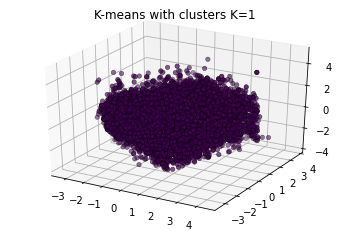

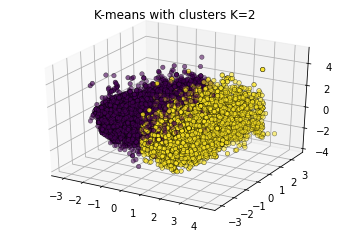

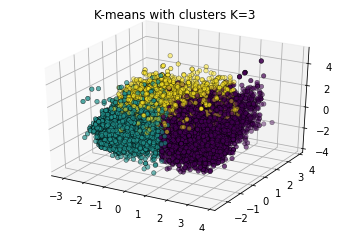

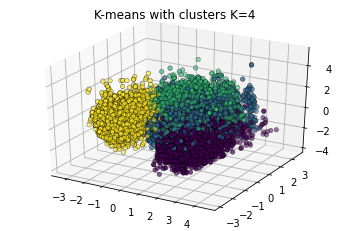

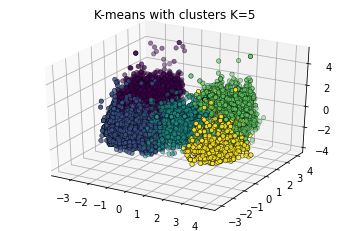

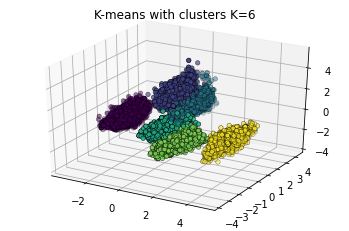

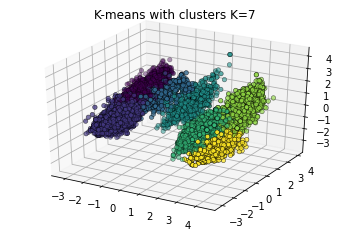

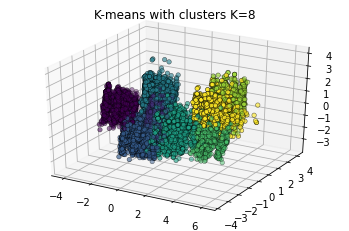

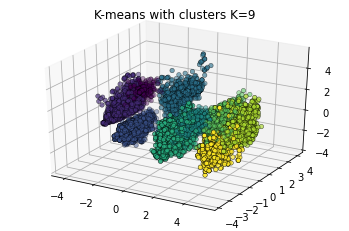

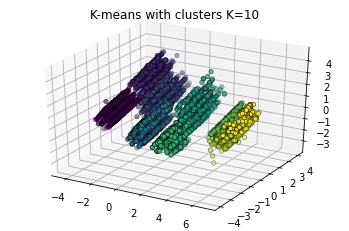

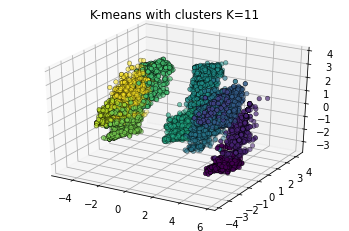

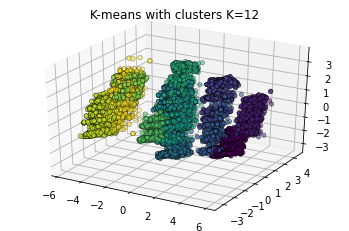

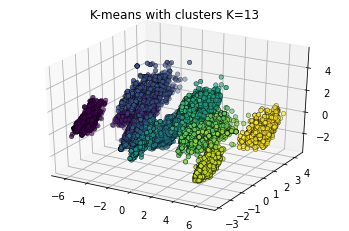

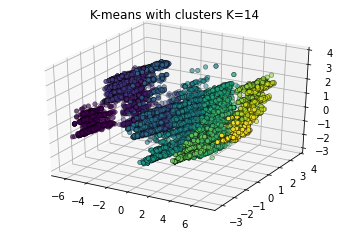

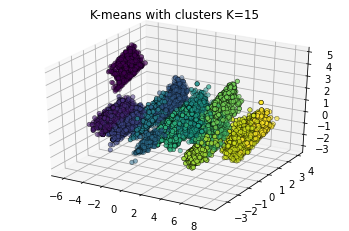

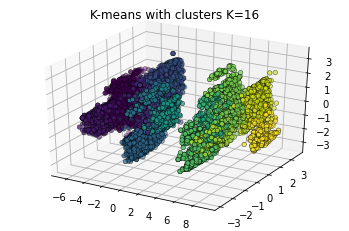

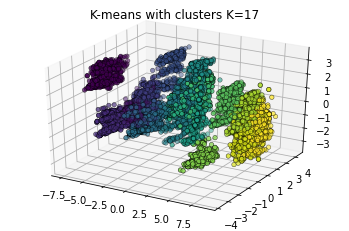

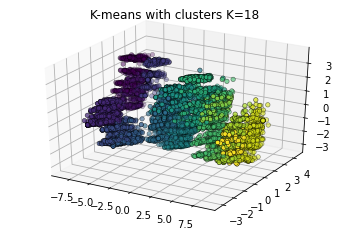

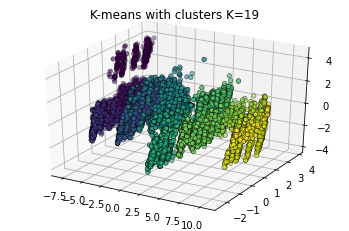

In [4]:
inertias = []
errors = {}
K = range(1, 20)
  
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    kmeans.fit(X)

    inertias.append(kmeans.inertia_)
    errors[k] = kmeans.inertia_

    # 2D
    # PCA and reducing

    #X['clusters'] = kmeans.fit_predict(X)
    #pca_num_components = 2

    #reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
    #results = pd.DataFrame(reduced_data, columns=['pca1','pca2'])

    #ns.scatterplot(x='pca1', y='pca2', hue=X['clusters'], data=results)

    #plt.scatter(results['pca1'], results['pca2'])

    #plt.title('K-means with clusters K=%i' %k)
    #plt.show()

    # 3D
    X['clusters'] = kmeans.fit_predict(X)
    pca_num_components = 3
    reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
    results = pd.DataFrame(reduced_data, columns=['pca1','pca2','pca3'])

    ax = plt.axes(projection='3d')
    ax.scatter3D(results['pca1'], results['pca2'], results['pca3'], c=X['clusters'], edgecolors='black', linewidth=0.5);
    plt.title('K-means with clusters K=%i' %k)
    plt.show()

1 : 146680.38268894234
2 : 118038.19375009804
3 : 104282.09903880373
4 : 97202.3787626742
5 : 91480.00415797473
6 : 86923.68436847605
7 : 84043.68250420313
8 : 79963.27689377051
9 : 77678.86374668528
10 : 75692.86391564536
11 : 73996.85693012152
12 : 72690.4837485576
13 : 71494.87777858517
14 : 70526.15727810262
15 : 69840.47154165502
16 : 68692.92601123128
17 : 67938.01154669959
18 : 67193.22183377751
19 : 66959.9017759936


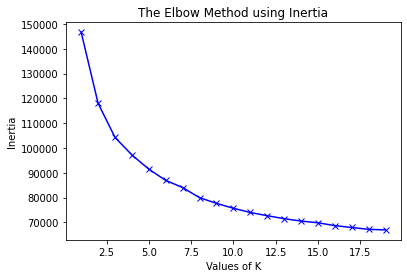

In [5]:
for key, val in errors.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

- delete 'brand' and 'code' = DONE
- Tokenize 'product_name' => 25 features then Word2Vec = DONE
- Load glove and Merge to DataFrame = DONE
- Use glove to train = DONE
- kmeans for total 30 features = DONE
- choose best k (elbow rule) => show loss = DONE => es 4 o 5 por ahi
- PCA to scatterplot = DONE


In [6]:
# K=4 es el mejor
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
X['clusters'] = kmeans.fit_predict(X)
X["nutriscore_grade"] = X["nutriscore_grade"].astype(float)
X

df_sin_discretizar_copia = pd_fn_copy
n = X[['nova_group','nutriscore_grade']].values
n

# Reducimos dimensiones con PCA
pca_num_components = 3

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data, columns=['pca1','pca2','pca3'])

# PARA graficacion 2D
#sns.scatterplot(x='pca1', y='pca2', hue=X['clusters'], data=results)
#plt.scatter(results['pca1'], results['pca2'])
#plt.title('K-means Clustering with 2 dimensions')
#plt.show()

# 3D

import plotly.express as px
#fig = px.scatter_3d(results, x='pca1', y='pca2', z='pca3', color=X['clusters'], hover_name=food_df_final['product_name'], symbol=X['nutriscore_grade'])
fig = px.scatter_3d(X, x=results['pca1'], y=results['pca2'], z=results['pca3'], color='clusters', hover_name=df_sin_discretizar_copia['food_groups_en'], symbol='nutriscore_grade', size='nova_group')
fig.update_traces(marker=dict(line=dict(width=0.1, color='Black')), selector=dict(mode='markers'))
fig.update_layout(autosize=False, width=1200, height=1000, margin=dict(l=10,r=10,b=100,t=20,pad=4),paper_bgcolor="LightSteelBlue",)
fig.show()


# Redes Neuronales

In [7]:
# usar KERAS
# usar los metodos de dropout

In [8]:
pca_num_components = 3
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data, columns=['pca1','pca2','pca3'])

In [9]:
# 50% training, 20% validate, 30% test
indexes = [i for i in range(len(X))]
np.random.shuffle(indexes)

train_index = indexes[0:7371] # 50%
validation_index = indexes[7371:8845] # 20%
test_index = indexes[8845:] # 30 %

inputs = np.array(results[['pca1','pca2']])
targets = np.array(results['pca3'])
x_train = inputs[train_index]
y_train = targets[train_index]
x_validation = inputs[validation_index]
y_validation = targets[validation_index]
x_test = inputs[test_index]
y_test = targets[test_index]


In [ ]:
# neural network classifier